<a href="https://colab.research.google.com/github/ErickNoGit/Aulas-ML/blob/main/Aula_13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [35]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalização de pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

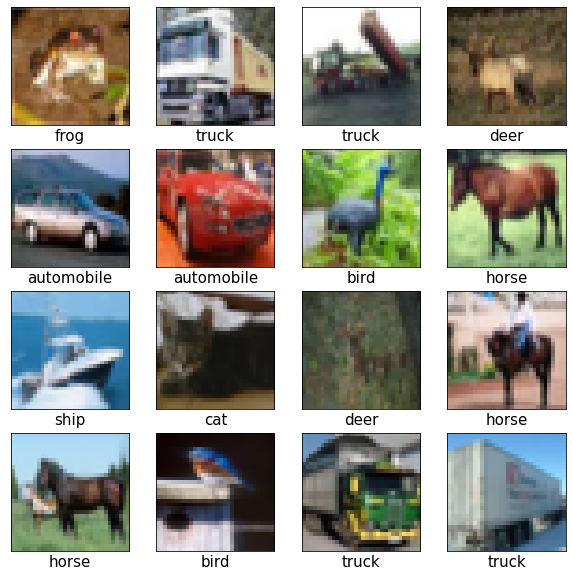

In [36]:
# Visualizando uma amostra dos dados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

In [37]:
model = models.Sequential(name= 'CNN-CIFAR10')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)              

In [43]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) #epochs precisa ser 10

Epoch 1/10
1563/1563 [==============================] - 115s 73ms/step - loss: 0.5798 - accuracy: 0.7948 - val_loss: 0.8957 - val_accuracy: 0.7086
Epoch 2/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.5440 - accuracy: 0.8064 - val_loss: 0.8995 - val_accuracy: 0.7133
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.5113 - accuracy: 0.8170 - val_loss: 0.9276 - val_accuracy: 0.7054
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4822 - accuracy: 0.8278 - val_loss: 0.9406 - val_accuracy: 0.7093
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.4559 - accuracy: 0.8364 - val_loss: 0.9553 - val_accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4262 - accuracy: 0.8475 - val_loss: 1.0129 - val_accuracy: 0.7071
Epoch 7/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.4003 - accuracy: 0.8566 - val_loss: 1.0813 

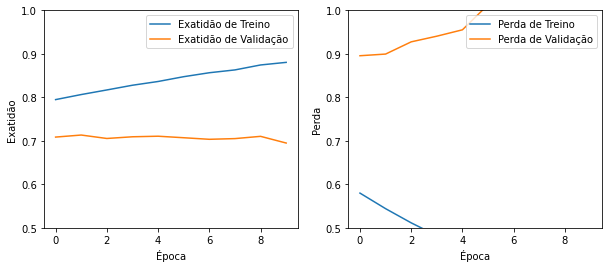

In [44]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Exatidão de Treino')
plt.plot(history.history['val_accuracy'], label='Exatidão de Validação')
plt.xlabel('Época')
plt.ylabel('Exatidão')
plt.ylim([0.5, 1])
plt.legend(loc= 'upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim([0.5, 1])
plt.legend(loc= 'upper right')

plt.show()

In [45]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 5s 17ms/step


In [46]:
import numpy as np

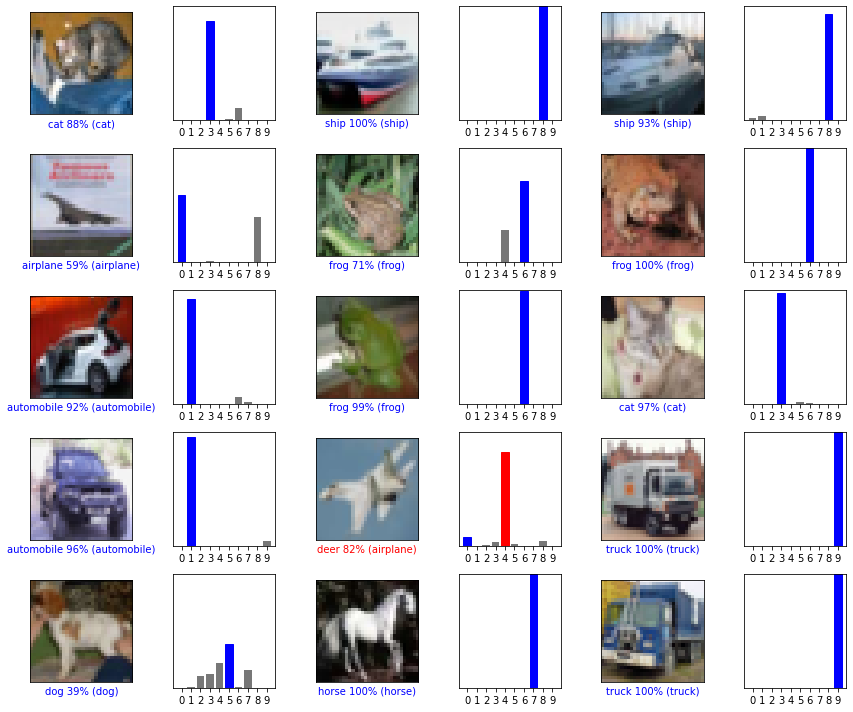

In [47]:
# Previosões corretas são marcadas em azul, erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()